# Significance of neutrophil-to-lymphocyte ratio for predicting clinical

outcomes in rectal cancer

R & Python Study Group (KIRAMS)

In [ ]:
library(readxl)
library(data.table)
suppressPackageStartupMessages(library(data.table))

load_raw_data <- function(folder_path, pattern) {
  excel_file_name <- list.files(folder_path, pattern = pattern)
  if(length(excel_file_name) == 0) {
    stop("No files starting with 'NLR' found in the specified folder.")
  }
  raw_data <- as.data.table(read_excel(file.path(folder_path, excel_file_name[1])))
  
  return(raw_data)
}

folder_path <- "C:/R/Projects/R-4.4.0-Rectal_Cancer_NLR/data/raw_data/"
pattern <- "NLR.*"
raw_data <- load_raw_data(folder_path, pattern)

In [ ]:
library(moonBook)
library(plyr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

In [ ]:
library(survival)
library(maxstat)

run_maxstat_test <- function(dt, column_name) {
  mstat <- maxstat.test(Surv(PDFS, RECUR) ~ dt[[column_name]], data = dt,
                        smethod = "LogRank", pmethod = "condMC", B = 999)
  return(mstat$estimate)
}

In [ ]:
remove_continuous_columns <- function(dt) {
  continuous_columns <- grep("continuous", names(dt), value = TRUE)
  dt[, (continuous_columns) := NULL]
  return(dt)
}

transform_column <- function(dt, column_name, cut_off_value) {
  # 기존 컬럼명을 컬럼명_continuous로 변경
  new_column_name <- paste(column_name, "_continuous", sep = "")
  setnames(dt, old = column_name, new = new_column_name)
  
  # 새로운 컬럼을 파생시키고 값을 설정
  dt[, (column_name) := ifelse(is.na(.SD), NA, ifelse(.SD > cut_off_value, 1, 0)), .SDcols = new_column_name]
  dt<-remove_continuous_columns(dt)
  
  return(dt)
}

In [ ]:
process_numeric_columns <- function(dt) {
  numeric_columns <- names(dt)[sapply(dt, is.numeric)]
  exclude_columns <- c("PDFS", "POS")  # 제외할 컬럼명 리스트
  for(col in numeric_columns) {
    if(col %in% exclude_columns) {
      next  # PDFS 또는 POS인 경우 다음 순회로 넘어감
    }
    cut_off_value <- run_maxstat_test(dt, col)
    dichotomized_data<-transform_column(dt, col, cut_off_value)
  }
  return(dt)
}


dichotomized_data<-process_numeric_columns(selected_data)

xtable<-mytable(RECUR ~ ., data = dichotomized_data)

In [ ]:
library(survival)
library(survminer)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: 'ggpubr'

The following object is masked from 'package:plyr':

    mutate


Attaching package: 'survminer'

The following object is masked from 'package:survival':

    myeloma

## Background

## Methods

### Patient cohort

We retrospectively reviewed **927** RC patients who underwent R0 surgical resection between **1998-01-13** and **2015-06-12** at the **MD Anderson Cancer Center**. Magnetic resonance imaging was used to evaluate the clinical stage of the tumour preoperatively. The final diagnosis of the patients was confirmed by routine pathology. The exclusion criteria were as follows: recurrent or metastatic RC confirmed preoperatively or at surgery, emergency cases, unavailable clinicopathological data, more than 1 primary cancer, receiving anticancer treatments preoperatively, resections with macro- or microscopically positive pathological margins and with active infection or the use systemic corticosteroids. The TNM classification of malignant tumours, 8th edition, edited by the Union for International Cancer Control (UICC) was used to determine the TNM stage. Patients with T1 RCs and no signs of lymph node metastasis on endorectal ultrasound or MRI underwent local excision through transanal endoscopic microsurgery (TEM), or laparoscopic or open surgery was performed. Informed consent was obtained from each patient, and the present study was approved by the Ethics Committee of the **KIRAMS.**

### Definitions

Peripheral blood was obtained 1 week prior to surgery. The NLR was determined by dividing the absolute neutrophil count by the absolute lymphocyte count; the PLR was determined by dividing the absolute platelet count by the absolute lymphocyte count; and the LMR was determined by dividing the absolute lymphocyte count by the absolute monocyte count. The PNI was calculated by the following formula: serum albumin (g/L) + 5 × total lymphocyte count × 109/L. \[19\] Postoperative complications were defined as any in-hospital or 30-day postoperative complication and graded according to the Clavien- Dindo classification \[20\].

### Follow-up and study endpoints

Patients were followed-up periodically after surgery. Re-examination was performed at 3-month intervals for the first 2 years postoperatively, every 6months for the next 3 years and every year thereafter. Physical examinations and blood tests, including serum carcinoembryonic antigen (CEA) levels, were performed at each follow-up. A chest X-ray and abdominopelvic computed tomography scan were performed every 6 months, and colonoscopy was performed annually or when there was a suspicion of recurrence. In addition, rigid rectoscopy and endorectal ultrasound were conducted at every visit except for the colonoscopy visit of the TEM patients. The primary endpoints were cancer recurrence or death. The secondary endpoint was the occurrence of postoperative complications. Overall survival (OS) was calculated as the date of diagnosis to the date of death from any cause. Disease-free survival (DFS) was defined as the time interval from cancer diagnosis until tumour recurrence or death from any cause.

### Statistical analysis

The data are presented as the mean ± standard deviation. Categorical variables were analysed with Pearson’s Chisquare test or Fisher’s exact test as appropriate. The cutoff values for NLR, PLR, LMR, and PNI were determined using **maxstat package test function**. Kaplan–Meier analysis and the log rank test were used to compare the survival curves of the 2 groups. Risk factors for poor survival were detected by univariate and multivariate analyses using the Cox proportional hazards model. Variables with a P value of \< 0.05 in the univariate analysis were further evaluated in the multivariate analysis to assess the independent predictors for OS and DFS. Statistical analyses were performed using **R version 4.4.0 (2024-04-24 ucrt).** A statistically significant difference was defined as a P value of \< 0.05.

## Results

### Baseline patient characteristics and inflammatory-related parameters

A total of **927** RC patients were enrolled in this study. The characteristics of the patients are shown in Table 1. Our study group comprised 90 (58.4%) male and 64 (41.6%) female patients, with a mean age of 63.7 years (range 32–90 years). A total of 63 (40.9%) patients had 1 or more comorbidities. TEM was conducted in 47 patients, while laparoscopic (n = 53) or open surgery (n = 54) was performed in 107 patients. No mortality occurred 30 days after the operation. A total of 26 complications (grade I-IVa) occurred in 22 (14.3%) patients postoperatively, including 22 grade I-II and 4 grade III-IVa complications. With a median followup interval of 42.4 months (range 12–89 months), the 3- year OS and DFS rates of all patients were 90.9 and 87.7%, respectively. Three patients died from a cause other than rectal cancer. The distributions of preoperative inflammatory-related parameters are shown in Table 2. The optimal cut-off values for preoperative NLR, PLR, LMR and PNI that best predicted OS were calculated to be 2.8 (area under the curve (AUC): 0.71; sensitivity: 53.0%; specificity: 84.0%), 140.0 (AUC: 0.64; sensitivity: 80.0%; specificity: 58.0%), 3.9 (AUC: 0.68; sensitivity: 73.0%; specificity: 65.0%), and 47.1 (AUC: 0.75; sensitivity: 60.0%; specificity: 83.0%), respectively (Fig. 1a-d). Then, the patients were dichotomized into high or low NLR/PLR/LMR/PNI groups with these cut-off values. The numbers and features of patients in each group are listed in Table 1.

In [ ]:
xtable


                Descriptive Statistics by 'RECUR'                
—————————————————————————————————————————————————————————————————— 
                                  No              Yes          p  
                               (N=795)          (N=132)     
—————————————————————————————————————————————————————————————————— 
 Male                                                        0.876
   - Female                  316 (39.7%)       54 (40.9%)         
   - Male                    479 (60.3%)       78 (59.1%)         
 CCTx                                                        0.736
   - 5FU                      2 ( 1.8%)         0 ( 0.0%)         
   - NA                       6 ( 5.4%)         0 ( 0.0%)         
   - XELODA                  104 (92.9%)       8 (100.0%)         
 ASA                                                         0.167
   - 2                        72 ( 9.1%)       9 ( 6.8%)          
   - 3                       266 (33.5%)       34 (25.8%)         

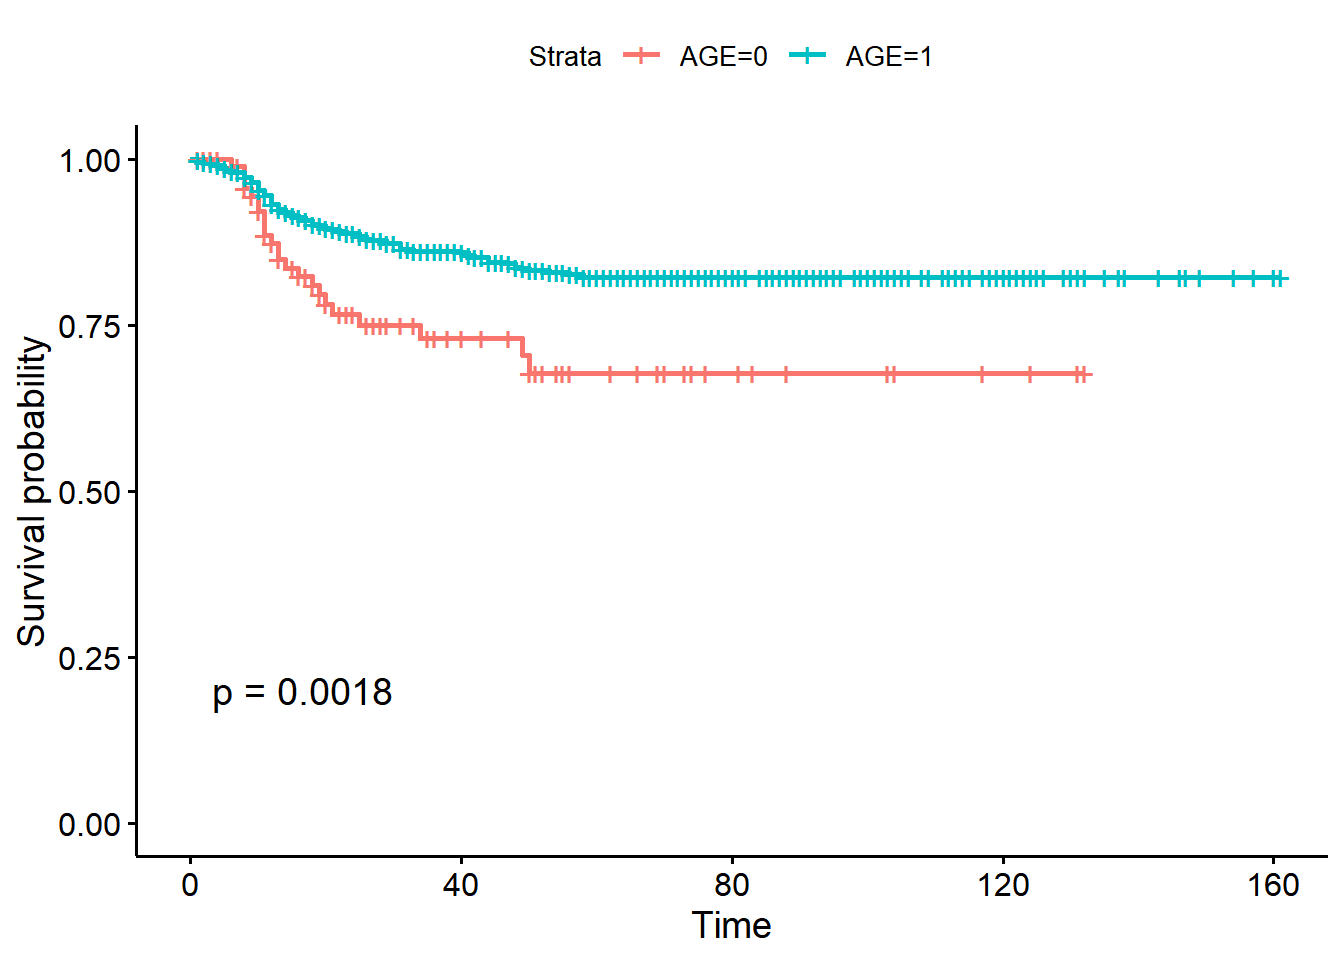

In [ ]:
Plot_AGE